<a href="https://colab.research.google.com/github/Shobika-Rajabaskar/ml_assignment/blob/main/Expenses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
from sklearn.preprocessing import LabelEncoder

Import all the necessary packages 

In [7]:
data=pd.read_csv("Expenses.csv")

Read csv file directly from uploaded

In [8]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867
5,31,female,26,0,no,southeast,3757
6,46,female,33,1,no,southeast,8241
7,37,female,28,3,no,northwest,7282
8,37,male,30,2,no,northeast,6406
9,60,female,26,0,no,northwest,28923


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1338 non-null   int64 
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   int64 
 3   children  1338 non-null   int64 
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 73.3+ KB


Find how the data is distributed and the key factors affecting charges

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.673393,1.094918,13270.417788
std,14.049960,6.095002,1.205493,12110.013559
min,18.000000,16.000000,0.000000,1122.000000
25%,27.000000,26.000000,0.000000,4740.000000
50%,39.000000,30.000000,1.000000,9382.000000
75%,51.000000,35.000000,2.000000,16640.250000
max,64.000000,53.000000,5.000000,63770.000000


Find the skewness of the data

In [11]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(dataats.skew(data.age),stats.skew(data.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.281822
age,0.055610
charges,1.514176


As seen above, charges has the highest skewness

Next, check for outliers



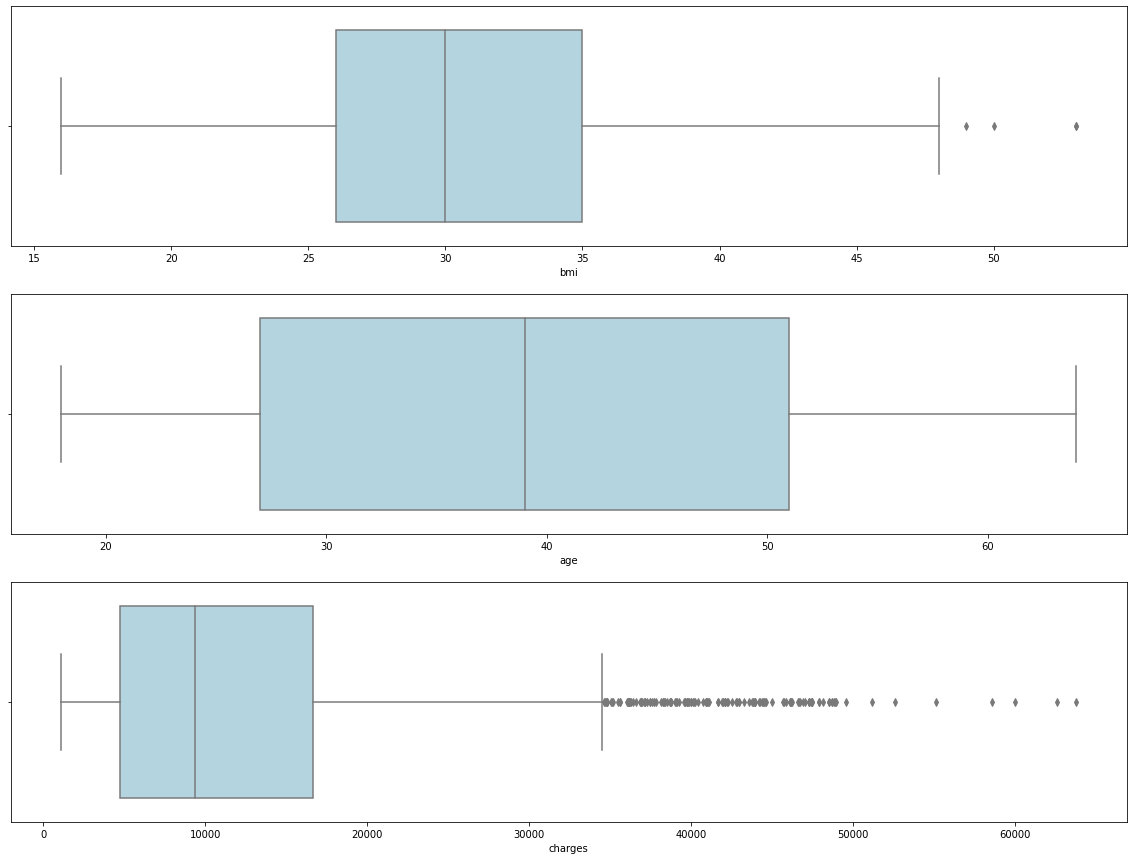

In [12]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= data.charges, color='lightblue')

plt.show()

Now check all the possible relations with all of the factors upon charges

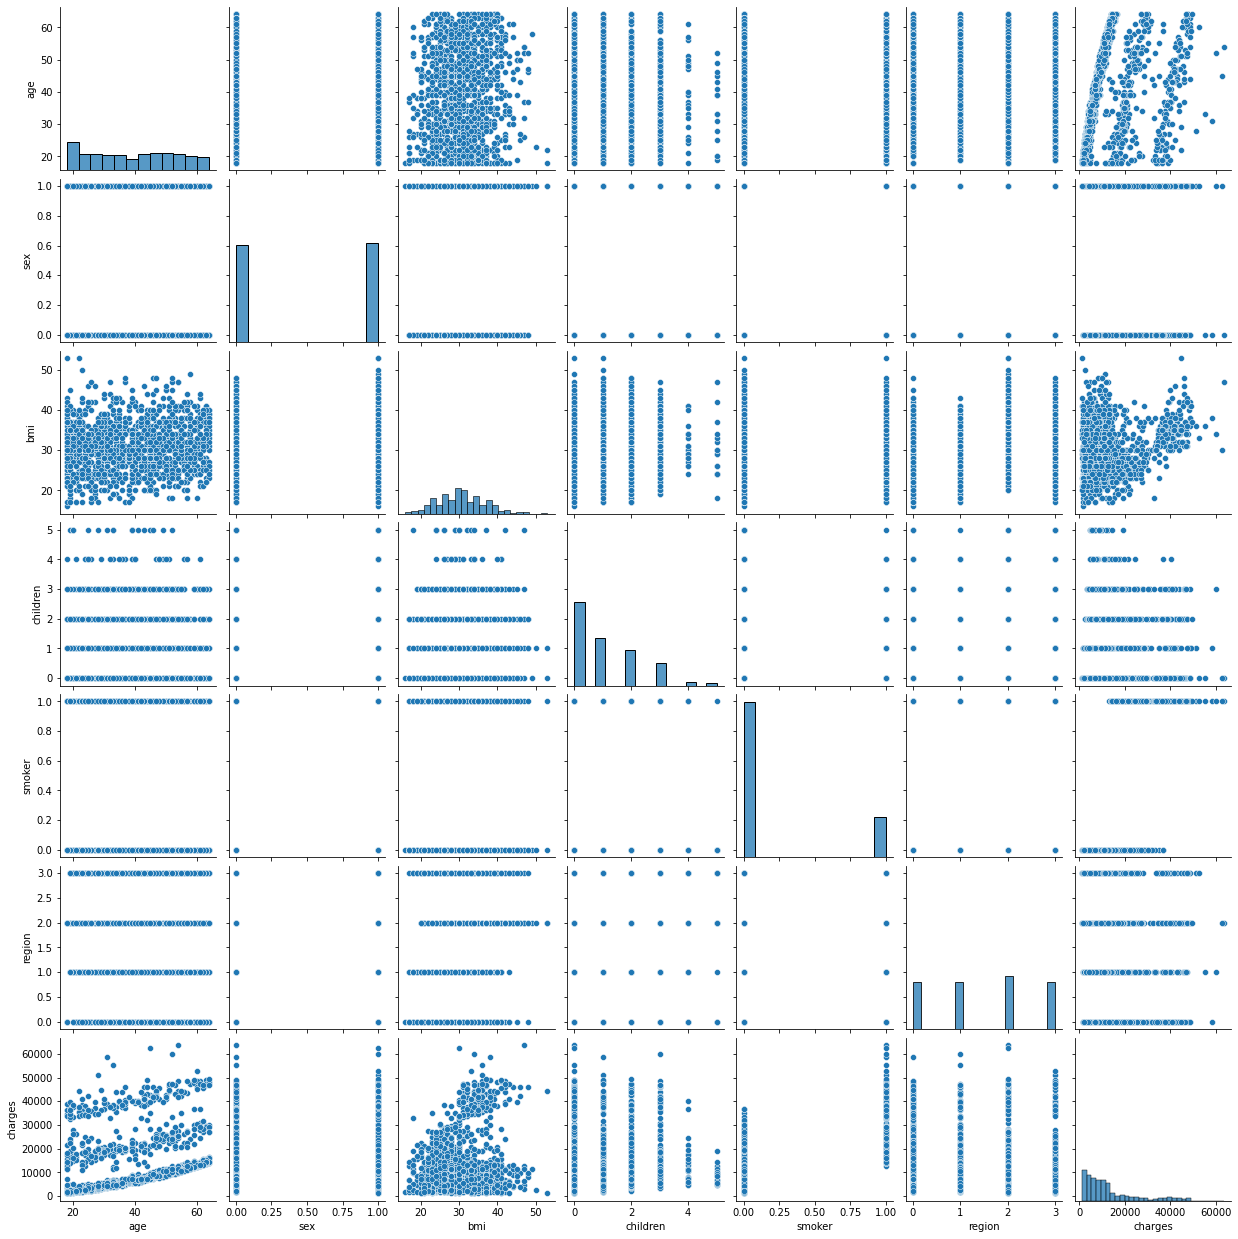

In [26]:
data = copy.deepcopy(data)
data.loc[:,['sex', 'smoker', 'region']] = data.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(data) 
plt.show()

In [ ]:
Smoking has the highest effect on charges. Visualize it to look upon useful inference

Text(0.5, 1.0, 'Effect of smoking on Charges')

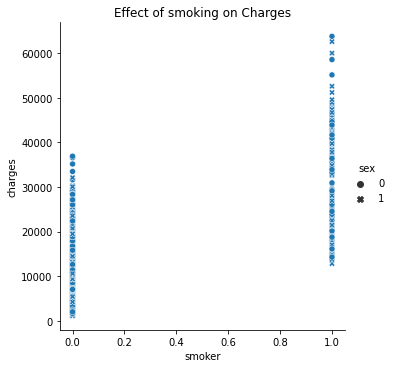

In [27]:
sns.relplot(x='smoker',y='charges',style='sex',data=data)
plt.title('Effect of smoking on Charges')

To check if age has any effect on charges, combine age with smokers to infer the outcome

Text(0.5, 1.0, 'Combined effect of Age and Smoking on Charges')

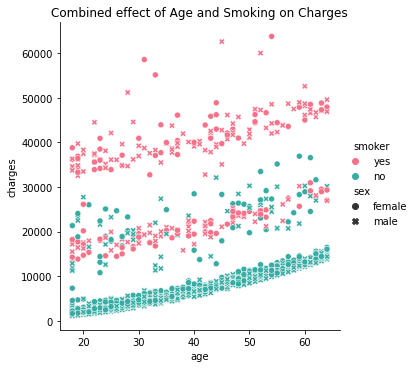

In [13]:
sns.relplot(x='age', y='charges', hue='smoker', style= 'sex', data=data, palette='husl')
plt.title('Effect of Age and Smoking on Charges')

Check with other factors too 

Text(0.5, 1.0, 'Effect of BMI on Charges')

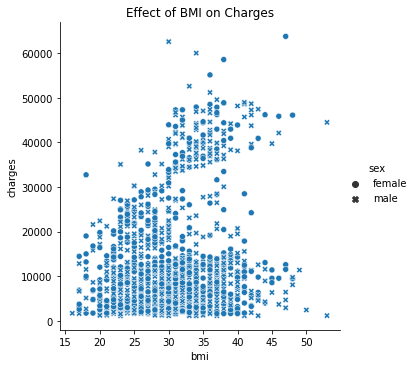

In [14]:
sns.relplot(x='bmi',y='charges',style='sex',data=data)
plt.title('Effect of BMI on Charges')

Increase in weight along with smoking causes increase in charges

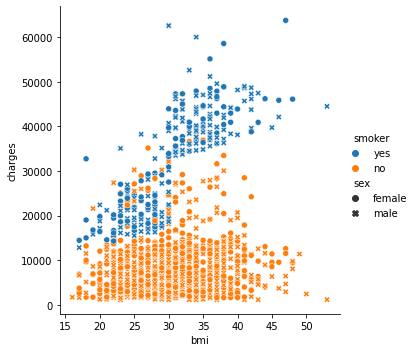

In [18]:
sns.relplot(x='bmi',y='charges',hue='smoker',style='sex',data=data)

The above plot shows the exact effect

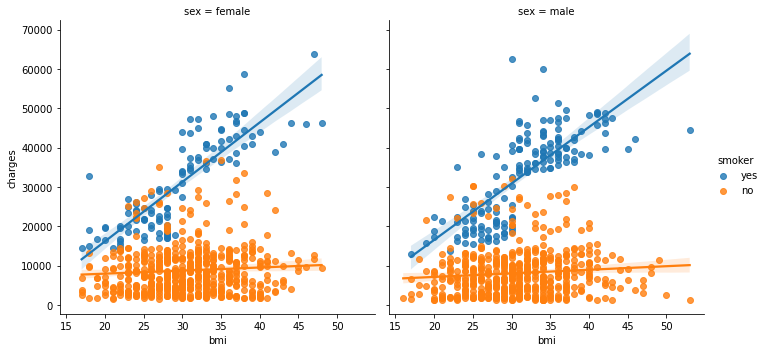

In [16]:
sns.lmplot(x='bmi',y='charges',hue='smoker', col='sex',data=data)

Seperating it for both the sexes provides a deeper insight into the data 

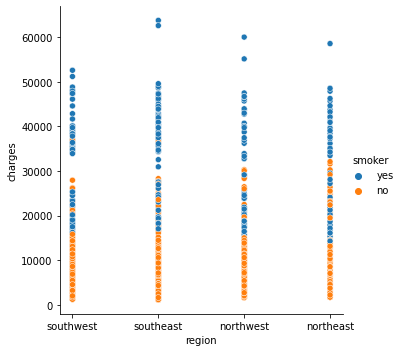

In [20]:
sns.relplot(x="region", y='charges', hue="smoker", data=data)

Now checking if region has any effect on the data

The key predictors of medical charges (obtained from this dataset) are age, bmi and smoking.